In [47]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.linear_model import LinearRegression

In [76]:
# Open csv file
efficency_fva = pd.read_csv('offensive_efficency_scores.csv')

In [77]:
# See first five games in the file
# Win = 1, Loss = 0 
efficency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficency,EfficentPointsScored,RawEOP
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,1,0.457627,33.406780,35.841356
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,1,0.565217,40.695652,46.709565
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,1,0.518987,44.632911,50.154937
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,1,0.500000,36.000000,41.320000
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,0,0.500000,30.500000,35.440000


In [79]:
# Create table with numeric values 
efficency_fva_numeric = efficency_fva.drop(columns = ['DateOfGame', 'Team ', 'Opponent'], axis = 1)

In [51]:
efficency_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   KaukaunaPointsScored  21 non-null     int64  
 1   FieldGoalAttempts     21 non-null     int64  
 2   FieldGoalsMade        21 non-null     int64  
 3   OffensiveRebounds     21 non-null     int64  
 4   Assists               21 non-null     int64  
 5   Turnovers             21 non-null     int64  
 6   WinOrLoss             21 non-null     int64  
 7   OffensiveEfficency    21 non-null     float64
 8   EfficentPointsScored  21 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 1.6 KB


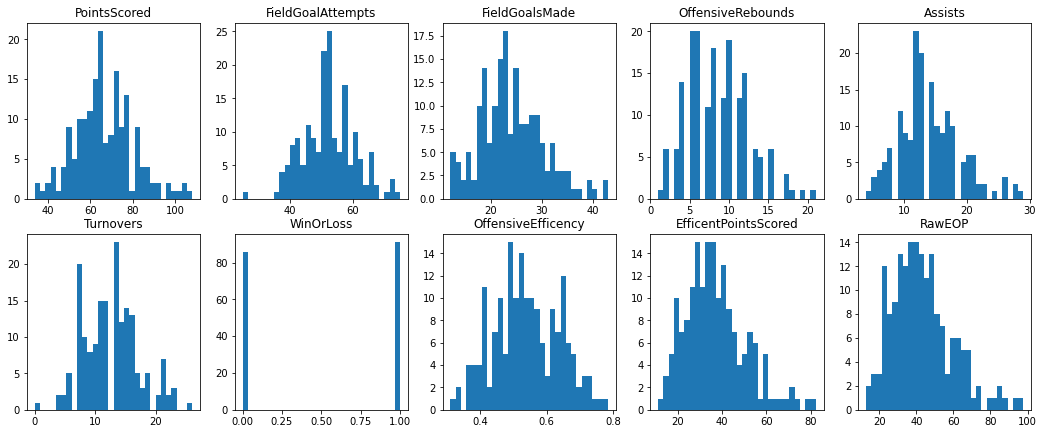

In [81]:
# See normality of data 
cols = list(efficency_fva_numeric)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(efficency_fva_numeric[cols[i]], bins=30)
    plt.title(cols[i])

In [82]:
# Correlations 
efficency_fva_numeric.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficency,EfficentPointsScored,RawEOP
PointsScored,1.000000,0.548945,0.906136,0.240928,0.642579,-0.234957,0.551793,0.769625,0.947802,0.928164
FieldGoalAttempts,0.548945,1.000000,0.646817,0.574090,0.401274,-0.187920,0.196623,0.273526,0.459444,0.456846
FieldGoalsMade,0.906136,0.646817,1.000000,0.289823,0.687233,-0.242564,0.486605,0.815158,0.920768,0.914803
OffensiveRebounds,0.240928,0.574090,0.289823,1.000000,0.196573,0.032617,0.229710,0.227043,0.258466,0.258356
Assists,0.642579,0.401274,0.687233,0.196573,1.000000,-0.188205,0.398761,0.753192,0.742938,0.800999
Turnovers,-0.234957,-0.187920,-0.242564,0.032617,-0.188205,1.000000,-0.258417,-0.484347,-0.373078,-0.368805
WinOrLoss,0.551793,0.196623,0.486605,0.229710,0.398761,-0.258417,1.000000,0.568929,0.582734,0.575062
OffensiveEfficency,0.769625,0.273526,0.815158,0.227043,0.753192,-0.484347,0.568929,1.000000,0.918801,0.930004
EfficentPointsScored,0.947802,0.459444,0.920768,0.258466,0.742938,-0.373078,0.582734,0.918801,1.000000,0.995382
RawEOP,0.928164,0.456846,0.914803,0.258356,0.800999,-0.368805,0.575062,0.930004,0.995382,1.000000


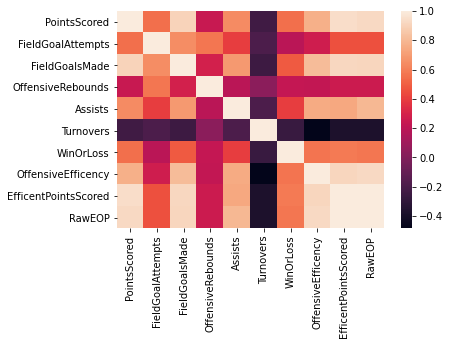

In [83]:
# Correlation heatmap
sns.heatmap(efficency_fva_numeric.corr());

In [86]:
# Create linear regression line for offensive efficency and points scored
X = efficency_fva_numeric['OffensiveEfficency'].values.reshape(-1,1)
y = efficency_fva_numeric ['PointsScored'].values.reshape(-1, 1)
lr = LinearRegression()
lr_fit = lr.fit(X, y)
predict_y = lr_fit.predict(X)

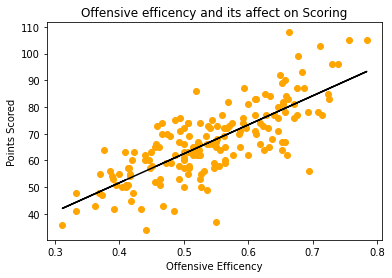

In [88]:
# Create visual for linear regression line 
plt.scatter(X, y, color = 'orange')
plt.plot(X, predict_y, color = 'black')
plt.title("Offensive efficency and its affect on Scoring")
plt.xlabel("Offensive Efficency")
plt.ylabel("Points Scored")
plt.show()